In [1]:
from scipy.optimize import minimize
import numpy as np
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def output(inputs, weights):
# Extracting weights for layers
  w11, w12, w21, w22, w3, w4, b1, b2 = weights
  x1, x2 = inputs.T
# Hidden layer
  h1 = sigmoid(w11 * x1 + w12 * x2 + b1)
  h2 = sigmoid(w21 * x1 + w22 * x2 + b1)
  y = w3 * h1 + w4 * h2 + b2
  return y

# Objective function (Mean Squared Error)
def mse(weights):
  predictions = output(X, weights)
  return np.mean((predictions - Y) ** 2)

data = np.array([
  [27.33, 229.17, 184.44],
  [30.16, 202.89, 163.61],
  [28.25, 206.80, 168.62],
  [27.26, 242.56, 163.60],
  [25.20, 157.10, 128.49],
  [28.98, 158.71, 162.77],
  [25.44, 152.02, 161.77],
  [33.16, 233.26, 165.81],
  [34.38, 227.82, 195.45],
  [24.52, 237.00, 155.12]
])

X = data[:, 0:2]
Y = data[:, -1]

initial_weights = np.random.rand(8)

# Optimizing the weights
result = minimize(mse, initial_weights, method='SLSQP') #Sequential Least Squares Programming

# Optimized weights
optimized_weights = result.x
optimized_weights, result.fun

(array([ 0.9018483 ,  0.34355581,  0.60222263,  0.83851682, 55.05411938,
        54.96085756,  0.7465203 , 54.95306752]),
 276.875876001976)

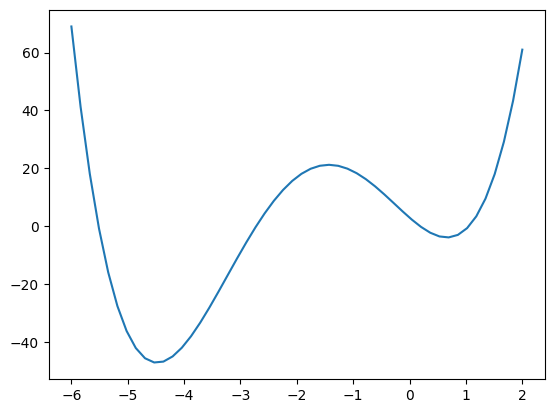

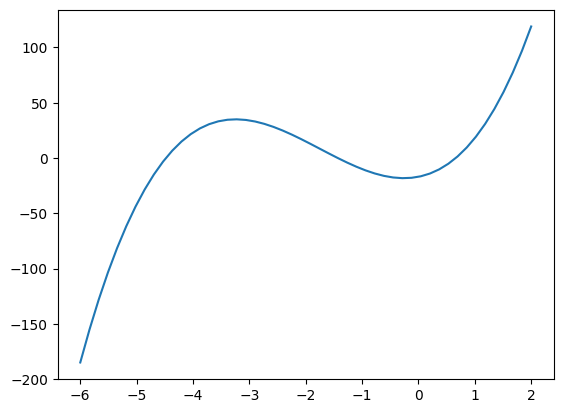

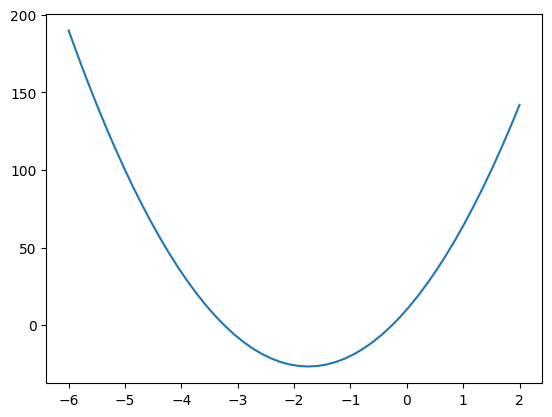

64


In [10]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-6, 2)
y= x**4 + 7*x**3 + 5*x**2 - 17*x + 3
plt.plot(x, y)
plt.show()

dy_dx = 4*x**3 + 21*x**2 + 10*x - 17
plt.plot(x, dy_dx)
plt.show()

d2y_d2x = 12*x**2 + 42*x + 10
plt.plot(x, d2y_d2x)
plt.show()

x = 1
d2y_d2x = 12*x**2 + 42*x + 10


Iteration 1: Cost 4352.088931274409, Weight        0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight        1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight        1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight        1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight        1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight        1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight        1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight        1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight        1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight        1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352

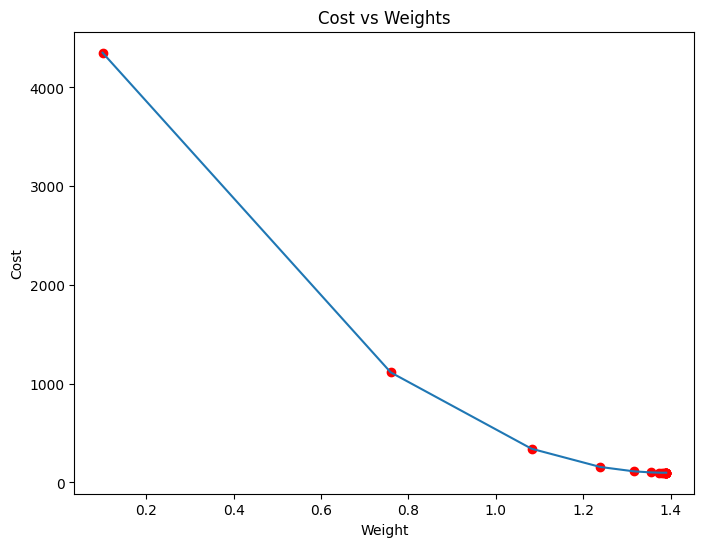

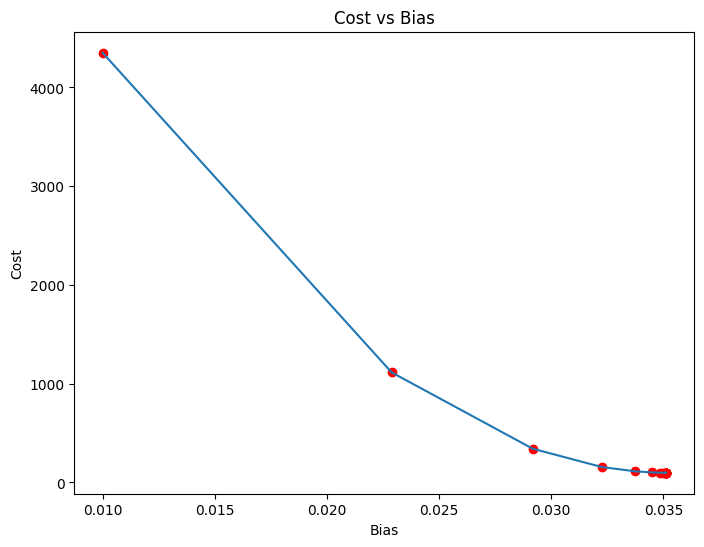

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


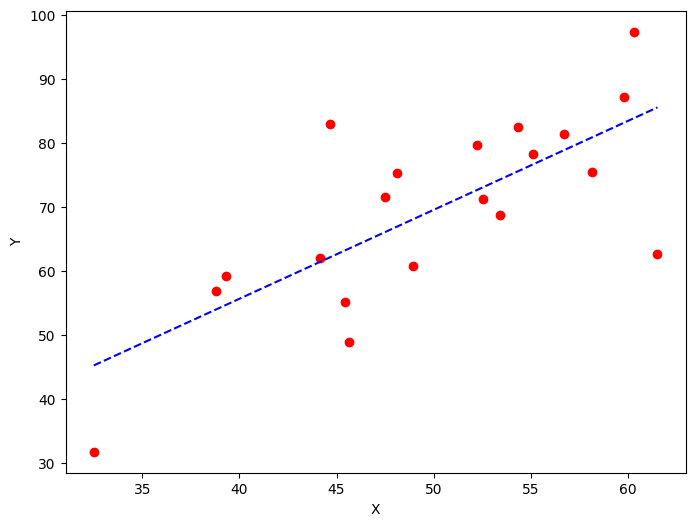

In [16]:
#Adapted from https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):

    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    bias = []

    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)
        bias.append(current_bias)


        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")


    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    plt.figure(figsize = (8,6))
    plt.plot(bias, costs)
    plt.scatter(bias, costs, marker='o', color='red')
    plt.title("Cost vs Bias")
    plt.ylabel("Cost")
    plt.xlabel("Bias")
    plt.show()


    return current_weight, current_bias


def main():

    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    X_pred = np.linspace(min(X), max(X))
    Y_pred = estimated_weight*X_pred + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    #plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
    plt.plot(X_pred, Y_pred, color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__=="__main__":
    main()

<ipython-input-18-d94490db6b99>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


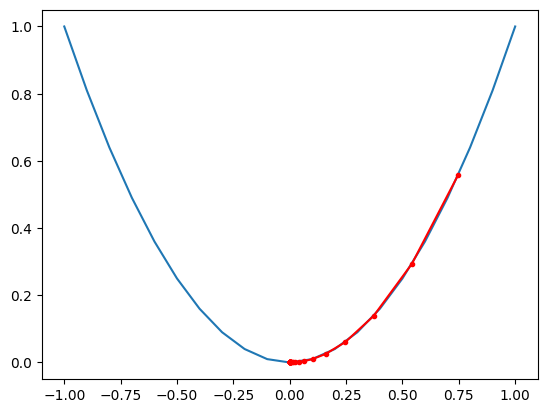

In [18]:
# Adapted from https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/
# example of plotting gradient descent with momentum for a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
 return x**2.0

# derivative of objective function
def derivative(x):
 return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
 # track all solutions
 solutions, scores = list(), list()
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # keep track of the change
 change = 0.0
 # run the gradient descent
 for i in range(n_iter):
  # calculate gradient
  gradient = derivative(solution)
  # calculate update
  new_change = step_size * gradient + momentum * change
  # take a step
  solution = solution - new_change
  # save the change
  change = new_change
  # evaluate candidate point
  solution_eval = objective(solution)
  # store solution
  solutions.append(solution)
  scores.append(solution_eval)
  # report progress
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
 return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()
